In [8]:
import pandas as pd

import json
from pandas.io.json import json_normalize

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15, 7)})

In [9]:
df = pd.read_json('logins.json')

df['ID'] = df['login_time']
df = df.set_index('ID')

In [10]:
df = df['login_time'].groupby(pd.Grouper(freq='15min')).agg('count')


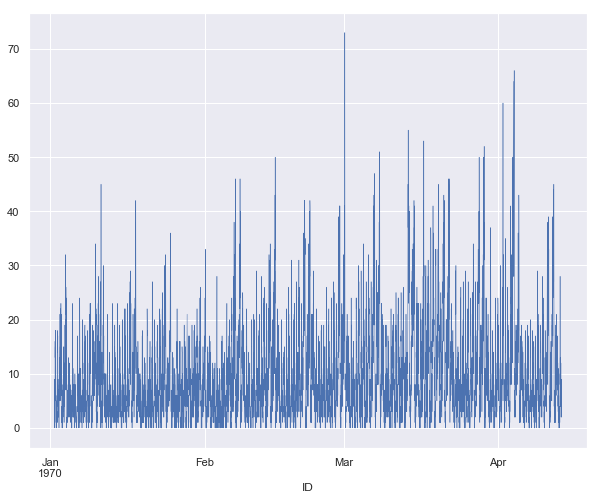

In [11]:
plt.rcParams["figure.figsize"] = (10,8)

df.plot(linewidth=0.5)
plt.show()

The plot above significant pattern that should be investigated:
1. Are there significant diffences in the number/average logins per month?
2. Which day of the week is the busiest?
3. When hour of the day do you have most logins?

#### Monthly patterns

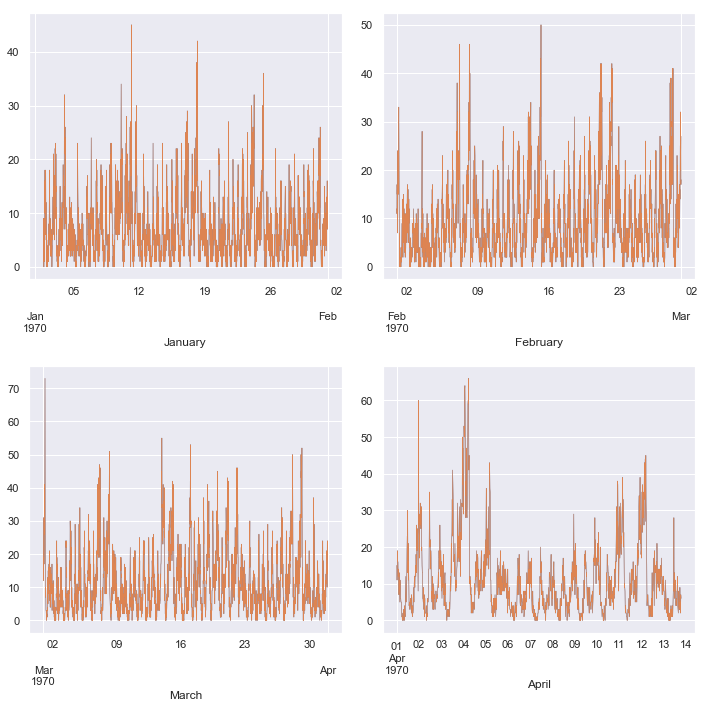

In [32]:
df_J = df.loc['1970-01']
df_F = df.loc['1970-02']
df_M = df.loc['1970-03']
df_A = df.loc['1970-04']

plt.rcParams["figure.figsize"] = (10,10)

plt.subplot(2,2,1)
df_J.plot(linewidth=0.5)
df_J.plot(linewidth=0.5)
plt.xlabel('January')


plt.subplot(2,2,2)
df_F.plot(linewidth=0.5)
df_F.plot(linewidth=0.5)
plt.xlabel('February')

plt.subplot(2,2,3)
df_M.plot(linewidth=0.5)
df_M.plot(linewidth=0.5)
plt.xlabel('March')

plt.subplot(2,2,4)
df_A.plot(linewidth=0.5)
df_A.plot(linewidth=0.5)
plt.xlabel('April')

plt.tight_layout()

plt.show()

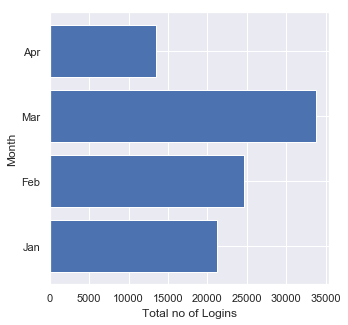

In [34]:
plt.rcParams["figure.figsize"] = (5,5)

by_month = df.groupby(df.index.month).sum()
by_month.index = ['Jan', 'Feb', 'Mar', 'Apr']
dm = by_month.reset_index()
plt.barh(dm['index'], dm['login_time'])
plt.xlabel('Total no of Logins')
plt.ylabel('Month')
plt.show()

The two plots above show that March had the most logins, perharps because of some holiday. However, it is unclear if April will have more logins than March, because we had data login data for April only till the middle of the month. But it was clear that January had the lowest number of logins.

#### Busiest Day of the week

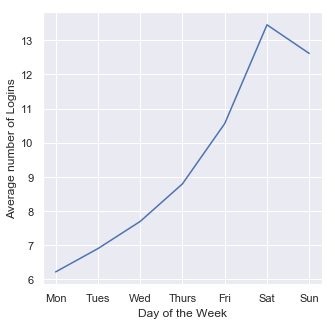

In [35]:
plt.rcParams["figure.figsize"] = (5,5)

by_weekday = df.groupby(df.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
dd = by_weekday.reset_index()
#by_weekday.plot(style=[':', '--', '-']);
plt.plot(dd['index'], dd['login_time'])
plt.xlabel('Day of the Week')
plt.ylabel('Average number of Logins')
plt.show()

As expected, the plot above indicate more the number of logins to the system increase as the week progress and weekends are the busiest.

#### Peak hours during the day

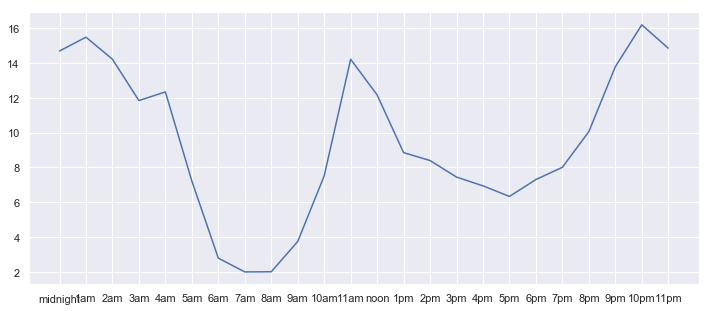

In [40]:
plt.rcParams["figure.figsize"] = (12,5)
by_hour = df.groupby(df.index.hour).mean()
by_hour.index = ['midnight', '1am', '2am', '3am', '4am', '5am', '6am', '7am', 
                    '8am', '9am', '10am', '11am', 'noon', '1pm', '2pm', '3pm',
                    '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
dh = by_hour.reset_index()
plt.plot(dh['index'], dh['login_time'])
plt.show()

This plot suggest that more people login to the system mostly between 8-11am and from about about 5pm - 10pm. This are generally the rush hours when people are trying to get to work early in the mornings, trying to get home in the evenings or attending social events late at night.

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/